## This notebook shows EDA on intermediate data not including stock performance. Near the bottom, there is a presentation visualization. We wanted this to get done before we were able to finish collecting and analyzing the stock performance data. Analysis on stock performance data is the main part of the project and was done by multiple people in multiple notebooks.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#setting up random seed for project requirements 
np.random.seed(73)

In [2]:
df = pd.read_csv('../data/house_senate_years_donations.csv')

In [3]:
df.head()

,transaction_date,ticker,asset_description,type,amount,representative,timestamp,merge_key,people,state,...,total_senate_years,total_house_years,total_years,donation_merge_key,name,total_raised,total_from_small_donors,percent_from_small_donors*,total_money_raised,party_y
0,2020-03-18,CBRE,CBRE Group Inc Common Stock Class A,sale_partial,"$1,001 - $15,000",Susie Lee,1584504000,Susie Lee,Susie Lee,Nevada,...,0,2,2,Susie Lee,Susie Lee,$4748019,$284775,6.00%,Raised over $100k,D
1,2020-03-24,CNC,Centene Corporation,purchase,"$1,001 - $15,000",Susie Lee,1585022400,Susie Lee,Susie Lee,Nevada,...,0,2,2,Susie Lee,Susie Lee,$4748019,$284775,6.00%,Raised over $100k,D
2,2020-03-31,DG,Dollar General Corporation,purchase,"$1,001 - $15,000",Susie Lee,1585627200,Susie Lee,Susie Lee,Nevada,...,0,2,2,Susie Lee,Susie Lee,$4748019,$284775,6.00%,Raised over $100k,D
3,2020-02-21,ENV,"Envestnet, Inc",sale_partial,"$1,001 - $15,000",Susie Lee,1582261200,Susie Lee,Susie Lee,Nevada,...,0,2,2,Susie Lee,Susie Lee,$4748019,$284775,6.00%,Raised over $100k,D
4,2020-03-17,LKQ,LKQ Corporation,sale_partial,"$1,001 - $15,000",Susie Lee,1584417600,Susie Lee,Susie Lee,Nevada,...,0,2,2,Susie Lee,Susie Lee,$4748019,$284775,6.00%,Raised over $100k,D


In [4]:
# Look through all of these columns for cleaning/dropping
pd.set_option('display.max_columns', 999)

In [5]:
df.head()

,transaction_date,ticker,asset_description,type,amount,representative,timestamp,merge_key,people,state,party_x,total_senate_years,total_house_years,total_years,donation_merge_key,name,total_raised,total_from_small_donors,percent_from_small_donors*,total_money_raised,party_y
0,2020-03-18,CBRE,CBRE Group Inc Common Stock Class A,sale_partial,"$1,001 - $15,000",Susie Lee,1584504000,Susie Lee,Susie Lee,Nevada,Democratic,0,2,2,Susie Lee,Susie Lee,$4748019,$284775,6.00%,Raised over $100k,D
1,2020-03-24,CNC,Centene Corporation,purchase,"$1,001 - $15,000",Susie Lee,1585022400,Susie Lee,Susie Lee,Nevada,Democratic,0,2,2,Susie Lee,Susie Lee,$4748019,$284775,6.00%,Raised over $100k,D
2,2020-03-31,DG,Dollar General Corporation,purchase,"$1,001 - $15,000",Susie Lee,1585627200,Susie Lee,Susie Lee,Nevada,Democratic,0,2,2,Susie Lee,Susie Lee,$4748019,$284775,6.00%,Raised over $100k,D
3,2020-02-21,ENV,"Envestnet, Inc",sale_partial,"$1,001 - $15,000",Susie Lee,1582261200,Susie Lee,Susie Lee,Nevada,Democratic,0,2,2,Susie Lee,Susie Lee,$4748019,$284775,6.00%,Raised over $100k,D
4,2020-03-17,LKQ,LKQ Corporation,sale_partial,"$1,001 - $15,000",Susie Lee,1584417600,Susie Lee,Susie Lee,Nevada,Democratic,0,2,2,Susie Lee,Susie Lee,$4748019,$284775,6.00%,Raised over $100k,D


In [6]:
df.groupby('name').mean().head(30)

,timestamp,total_senate_years,total_house_years,total_years
name,,,,
Adam Kinzinger,1.588723e+09,0.0,10.000000,10.000000
Alan Lowenthal,1.594659e+09,0.0,8.000000,8.000000
Andre Carson,1.619150e+09,0.0,0.000000,0.000000
Angus King,1.498886e+09,8.0,0.000000,8.000000
Anthony Gonzalez,1.609705e+09,0.0,2.000000,2.000000
Austin Scott,1.609924e+09,0.0,10.000000,10.000000
Ben Cardin,1.416200e+09,14.0,20.000000,34.000000
Bill Cassidy,1.525277e+09,6.0,6.000000,12.000000
Bill Flores,1.576732e+09,0.0,10.000000,10.000000


**Conclusion**: I wasn't sure where total_years came from. It is clearly the sum of total senate and house years

### Analyze dataframe with just total_years. This is the most relevant information.

In [7]:
df_just_total_yr = df.drop(columns=['total_senate_years', 'total_house_years'])

In [8]:
df_just_total_yr.dtypes

transaction_date              object
ticker                        object
asset_description             object
type                          object
amount                        object
representative                object
timestamp                      int64
merge_key                     object
people                        object
state                         object
party_x                       object
total_years                    int64
donation_merge_key            object
name                          object
total_raised                  object
total_from_small_donors       object
percent_from_small_donors*    object
total_money_raised            object
party_y                       object
dtype: object

#### Nulls for just_total_yr

In [9]:
df_just_total_yr.isnull().sum()

transaction_date                0
ticker                          0
asset_description               0
type                            0
amount                          0
representative                  0
timestamp                       0
merge_key                       0
people                          0
state                           0
party_x                         0
total_years                     0
donation_merge_key            448
name                          448
total_raised                  448
total_from_small_donors       448
percent_from_small_donors*    448
total_money_raised            448
party_y                       448
dtype: int64

In [10]:
df_just_total_yr.shape

(13223, 19)

In [11]:
df_just_total_yr.dropna(inplace=True)

In [12]:
# Concluded that dropping rows with nulls does not remove a lot of information
df_just_total_yr.shape

(12775, 19)

#### Fix numerical columns

In [13]:
df_just_total_yr['total_raised'] = df_just_total_yr['total_raised'].str.replace('$','').astype(int)

In [14]:
df_just_total_yr['total_from_small_donors'] = df_just_total_yr['total_from_small_donors'].str.replace('$','').astype(int)

In [15]:
df_just_total_yr['percent_from_small_donors'] = df_just_total_yr['percent_from_small_donors*'].str.replace('%','').astype(float)

In [16]:
df_just_total_yr.head()

,transaction_date,ticker,asset_description,type,amount,representative,timestamp,merge_key,people,state,party_x,total_years,donation_merge_key,name,total_raised,total_from_small_donors,percent_from_small_donors*,total_money_raised,party_y,percent_from_small_donors
0,2020-03-18,CBRE,CBRE Group Inc Common Stock Class A,sale_partial,"$1,001 - $15,000",Susie Lee,1584504000,Susie Lee,Susie Lee,Nevada,Democratic,2,Susie Lee,Susie Lee,4748019,284775,6.00%,Raised over $100k,D,6.0
1,2020-03-24,CNC,Centene Corporation,purchase,"$1,001 - $15,000",Susie Lee,1585022400,Susie Lee,Susie Lee,Nevada,Democratic,2,Susie Lee,Susie Lee,4748019,284775,6.00%,Raised over $100k,D,6.0
2,2020-03-31,DG,Dollar General Corporation,purchase,"$1,001 - $15,000",Susie Lee,1585627200,Susie Lee,Susie Lee,Nevada,Democratic,2,Susie Lee,Susie Lee,4748019,284775,6.00%,Raised over $100k,D,6.0
3,2020-02-21,ENV,"Envestnet, Inc",sale_partial,"$1,001 - $15,000",Susie Lee,1582261200,Susie Lee,Susie Lee,Nevada,Democratic,2,Susie Lee,Susie Lee,4748019,284775,6.00%,Raised over $100k,D,6.0
4,2020-03-17,LKQ,LKQ Corporation,sale_partial,"$1,001 - $15,000",Susie Lee,1584417600,Susie Lee,Susie Lee,Nevada,Democratic,2,Susie Lee,Susie Lee,4748019,284775,6.00%,Raised over $100k,D,6.0


In [17]:
# drop column with repetitive numerical data
df_just_total_yr.drop(columns=['percent_from_small_donors*'], inplace=True)

In [18]:
df_just_total_yr.dtypes

transaction_date              object
ticker                        object
asset_description             object
type                          object
amount                        object
representative                object
timestamp                      int64
merge_key                     object
people                        object
state                         object
party_x                       object
total_years                    int64
donation_merge_key            object
name                          object
total_raised                   int64
total_from_small_donors        int64
total_money_raised            object
party_y                       object
percent_from_small_donors    float64
dtype: object

## EDA

In [19]:
types_df = df_just_total_yr['type'].value_counts()

In [20]:
types_df = pd.DataFrame(types_df)
types_df

,type
purchase,6454
sale_full,3602
sale_partial,2596
exchange,123


#### There are approximately equal proportions of purchases and sales

In [21]:
df_just_total_yr.groupby('party_y').mean()

,timestamp,total_years,total_raised,total_from_small_donors,percent_from_small_donors
party_y,,,,,
D,1.574670e+09,9.823766,4.928502e+06,5.967212e+05,7.808011
I,1.498886e+09,8.000000,5.380897e+06,6.592000e+05,12.250000
L,1.584504e+09,10.000000,1.001120e+06,5.450770e+05,54.450000
R,1.543911e+09,10.392131,3.813692e+07,8.279793e+06,12.078755


**Conclusion**: The average percent from small donors is small. 8% for Democrats, 12% for Republicans. For this dataset, Republican total years in office is slightly higher.

<AxesSubplot:>

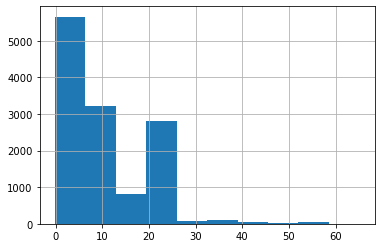

In [22]:
df_just_total_yr['percent_from_small_donors'].hist()

**Conclusion**: Very right-skewed. Some members have an unusually high percentage of small donors, most rely on large donors

In [23]:
df_just_total_yr.corr()

,timestamp,total_years,total_raised,total_from_small_donors,percent_from_small_donors
timestamp,1.000000,-0.178793,-0.333156,-0.316825,-0.300357
total_years,-0.178793,1.000000,-0.330134,-0.327359,-0.250704
total_raised,-0.333156,-0.330134,1.000000,0.993658,0.730360
total_from_small_donors,-0.316825,-0.327359,0.993658,1.000000,0.765281
percent_from_small_donors,-0.300357,-0.250704,0.730360,0.765281,1.000000


In [24]:
df_tot_yr_corr = df_just_total_yr[['total_years', 'total_raised', 'percent_from_small_donors']]

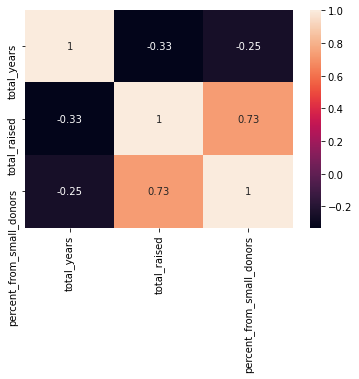

In [25]:
sns.heatmap(df_tot_yr_corr.corr(), annot=True);

#### The only interesting correlation is between total money raised and percent from small donors

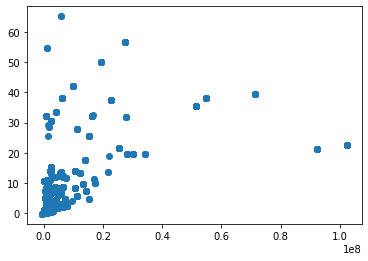

In [26]:
plt.scatter(df_just_total_yr['total_raised'], df_just_total_yr['percent_from_small_donors']);

#### Unclear what to make of this relationship. Won't include in presentation.

In [27]:
df_just_total_yr['total_money_raised'].value_counts()

Raised over $100k         12757
Raised less than $100k       18
Name: total_money_raised, dtype: int64

**Conclusion**: Drop this column

## Analyze transaction amount data. The final dataset dropped a number of rows and some amount ranges got left out, so I am using the original dataset.

In [28]:
amounts_df = df_just_total_yr.groupby('amount').mean()
amounts_df

,timestamp,total_years,total_raised,total_from_small_donors,percent_from_small_donors
amount,,,,,
"$1,000,001 - $5,000,000",1.585744e+09,14.111111,3.715813e+07,1.086464e+07,27.338889
"$1,001 -",1.593182e+09,7.924171,8.464766e+05,5.139740e+04,4.914408
"$1,001 - $15,000",1.555182e+09,9.247332,2.298983e+07,4.729556e+06,10.324825
"$100,001 - $250,000",1.572797e+09,8.247059,2.930259e+07,6.207043e+06,9.927647
"$15,001 - $50,000",1.561621e+09,12.620980,2.366122e+07,4.983116e+06,9.804087
"$25,000,001 - $50,000,000",1.424408e+09,24.000000,2.996712e+07,5.858913e+06,19.550000
"$250,001 - $500,000",1.588575e+09,7.967742,2.518294e+07,6.158592e+06,13.950323
"$5,000,001 - $25,000,000",1.590429e+09,3.285714,6.643496e+07,1.410567e+07,17.118571
"$50,000,000 +",1.619496e+09,0.000000,1.665406e+07,5.391285e+06,32.370000


In [29]:
amounts_df = amounts_df.drop(columns=['timestamp', 'total_from_small_donors']).reset_index()

In [30]:
# Create a new column for an index to sort these from smallest to largest
amounts_df['real_index'] = [7,0,1,4,2,9,5,8,10,3,6]
amounts_df

,amount,total_years,total_raised,percent_from_small_donors,real_index
0,"$1,000,001 - $5,000,000",14.111111,3.715813e+07,27.338889,7
1,"$1,001 -",7.924171,8.464766e+05,4.914408,0
2,"$1,001 - $15,000",9.247332,2.298983e+07,10.324825,1
3,"$100,001 - $250,000",8.247059,2.930259e+07,9.927647,4
4,"$15,001 - $50,000",12.620980,2.366122e+07,9.804087,2
5,"$25,000,001 - $50,000,000",24.000000,2.996712e+07,19.550000,9
6,"$250,001 - $500,000",7.967742,2.518294e+07,13.950323,5
7,"$5,000,001 - $25,000,000",3.285714,6.643496e+07,17.118571,8
8,"$50,000,000 +",0.000000,1.665406e+07,32.370000,10
9,"$50,001 - $100,000",16.279586,1.461506e+07,7.327189,3


In [31]:
# need to set index in seperate line as far as I can tell
amounts_df.set_index('real_index', inplace=True)

In [32]:
# finalize dataframe
amounts_df = amounts_df.sort_index()
amounts_df

,amount,total_years,total_raised,percent_from_small_donors
real_index,,,,
0,"$1,001 -",7.924171,8.464766e+05,4.914408
1,"$1,001 - $15,000",9.247332,2.298983e+07,10.324825
2,"$15,001 - $50,000",12.620980,2.366122e+07,9.804087
3,"$50,001 - $100,000",16.279586,1.461506e+07,7.327189
4,"$100,001 - $250,000",8.247059,2.930259e+07,9.927647
5,"$250,001 - $500,000",7.967742,2.518294e+07,13.950323
6,"$500,001 - $1,000,000",17.842105,2.357612e+07,26.301316
7,"$1,000,001 - $5,000,000",14.111111,3.715813e+07,27.338889
8,"$5,000,001 - $25,000,000",3.285714,6.643496e+07,17.118571


In [33]:
amount_level = list(range(1,12))
amount_level

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [34]:
amounts_df['amount_level'] = amount_level
amounts_df

,amount,total_years,total_raised,percent_from_small_donors,amount_level
real_index,,,,,
0,"$1,001 -",7.924171,8.464766e+05,4.914408,1
1,"$1,001 - $15,000",9.247332,2.298983e+07,10.324825,2
2,"$15,001 - $50,000",12.620980,2.366122e+07,9.804087,3
3,"$50,001 - $100,000",16.279586,1.461506e+07,7.327189,4
4,"$100,001 - $250,000",8.247059,2.930259e+07,9.927647,5
5,"$250,001 - $500,000",7.967742,2.518294e+07,13.950323,6
6,"$500,001 - $1,000,000",17.842105,2.357612e+07,26.301316,7
7,"$1,000,001 - $5,000,000",14.111111,3.715813e+07,27.338889,8
8,"$5,000,001 - $25,000,000",3.285714,6.643496e+07,17.118571,9


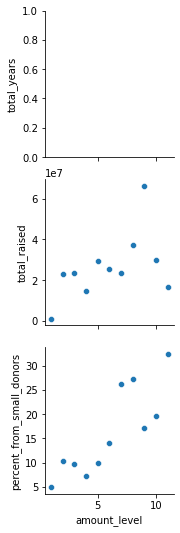

In [35]:
sns.pairplot(amounts_df, y_vars=['total_years', 'total_raised', 'percent_from_small_donors'], x_vars=['amount_level']);

there is an unexpected positive relationship between the size of the transactions and both the total amount of money raised and the percent from small donors. However, the limitations of the dataset make this tough to interpret. 

<AxesSubplot:xlabel='amount_level', ylabel='total_years'>

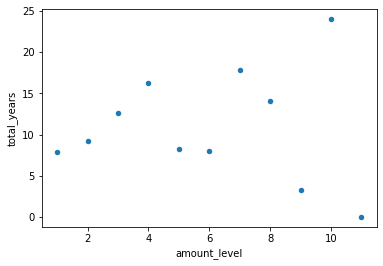

In [36]:
amounts_df.plot.scatter(x='amount_level', y='total_years')

#### After discussing this with the rest of the team, the amount level is a strange data point because of how much the ranges of amounts vary (e.g. 1,001 to 15,000 vs 1,000,001 to 5,000,000). The skewed distribution makes this problematic too. 

## Visualize transaction amount distribution, which we decided to use in the presentation

In [37]:
# create an amounts distribution dataframe
amounts_dist = pd.DataFrame(df['amount'].value_counts().
                              sort_index().reset_index())
amounts_dist.columns = ['Amount', 'Transactions']
amounts_dist

,Amount,Transactions
0,"$1,000,001 - $5,000,000",28
1,"$1,001 -",211
2,"$1,001 - $15,000",9580
3,"$100,001 - $250,000",430
4,"$15,001 - $50,000",2137
5,"$25,000,001 - $50,000,000",1
6,"$250,001 - $500,000",93
7,"$5,000,001 - $25,000,000",7
8,"$50,000,000 +",1
9,"$50,001 - $100,000",697


In [38]:
# Create a new column for an index to sort these from smallest to largest
amounts_dist['real_index'] = [7,0,1,4,2,9,5,8,10,3,6]
amounts_dist

,Amount,Transactions,real_index
0,"$1,000,001 - $5,000,000",28,7
1,"$1,001 -",211,0
2,"$1,001 - $15,000",9580,1
3,"$100,001 - $250,000",430,4
4,"$15,001 - $50,000",2137,2
5,"$25,000,001 - $50,000,000",1,9
6,"$250,001 - $500,000",93,5
7,"$5,000,001 - $25,000,000",7,8
8,"$50,000,000 +",1,10
9,"$50,001 - $100,000",697,3


In [39]:
amounts_dist.set_index('real_index', inplace=True)

In [40]:
# finalize dataframe
amounts_dist = amounts_dist.sort_index()
amounts_dist

,Amount,Transactions
real_index,,
0,"$1,001 -",211
1,"$1,001 - $15,000",9580
2,"$15,001 - $50,000",2137
3,"$50,001 - $100,000",697
4,"$100,001 - $250,000",430
5,"$250,001 - $500,000",93
6,"$500,001 - $1,000,000",38
7,"$1,000,001 - $5,000,000",28
8,"$5,000,001 - $25,000,000",7


In [41]:
# get final dataframe for the visualization
amounts_dist.set_index('Amount', inplace=True)

In [42]:
amounts_dist

,Transactions
Amount,
"$1,001 -",211
"$1,001 - $15,000",9580
"$15,001 - $50,000",2137
"$50,001 - $100,000",697
"$100,001 - $250,000",430
"$250,001 - $500,000",93
"$500,001 - $1,000,000",38
"$1,000,001 - $5,000,000",28
"$5,000,001 - $25,000,000",7


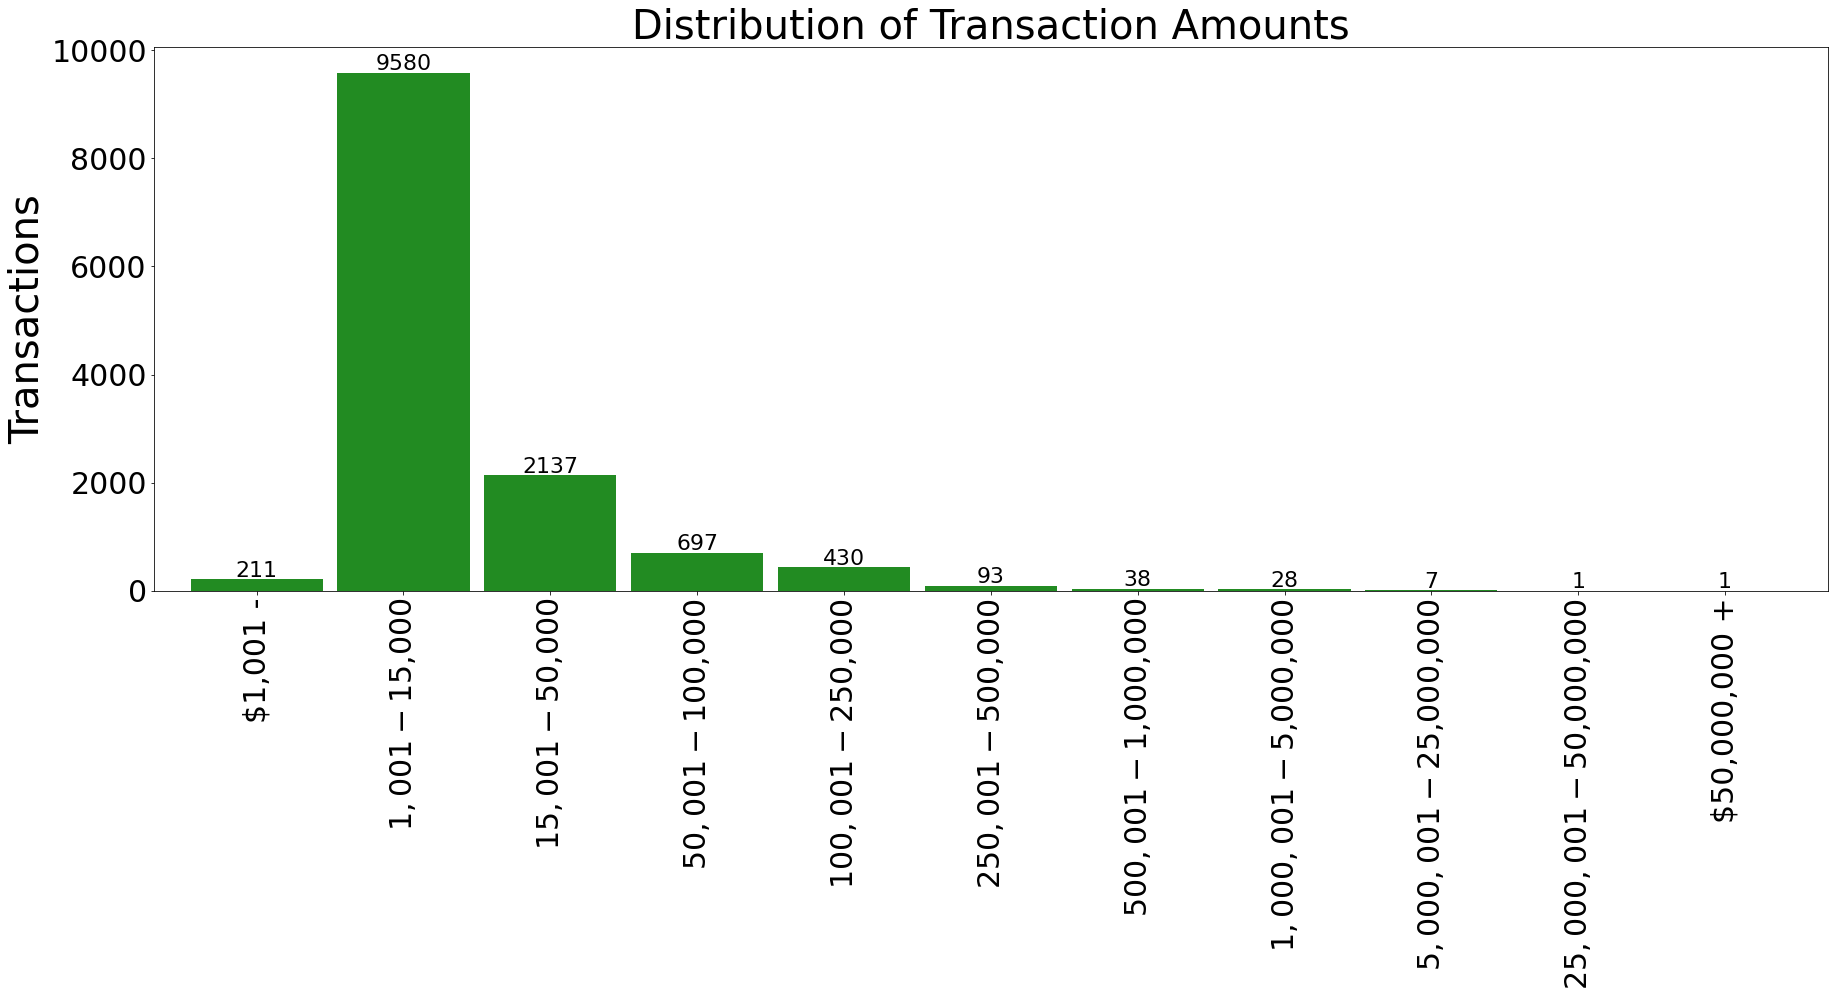

In [43]:
# referred to https://stackoverflow.com/questions/52080991/display-percentage-above-bar-chart-in-matplotlib
ax = amounts_dist.plot(kind='bar', legend=False, figsize=(30, 10), width = 0.9, 
                     color='forestgreen', xlabel='')
plt.title("Distribution of Transaction Amounts", fontsize=40)
ax.set_ylabel("Transactions", fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, (y + height + 50)), ha='center', fontsize=22);

**Interpretation** 

The distribution of transaction amounts shows the number of transactions for each reporting amount level. It shows that the vast majority of transactions are between 1,000 and 50,000 dollars. More detailed information is not available.

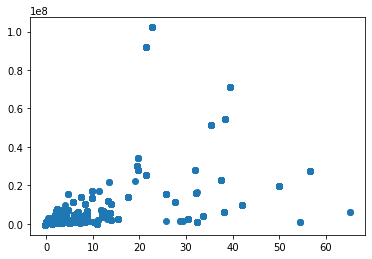

In [44]:
plt.scatter(df_just_total_yr['percent_from_small_donors'], df_just_total_yr['total_raised']);

**Interpretation**
The above graph shows a positive relationship but also shows heteroskedasticity. So a higher percentage of small donors is associated with more fundraising but the relationship is complicated.